**Importing the libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

SEED = 2017

Using TensorFlow backend.


**Load the dataset:**

In [0]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", 
                   sep = ';')

y = data['quality']
X = data.drop(['quality'], axis = 1)

**Split the dataset into training and testing sets:**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = SEED)

**Normalizing the input data:**

In [0]:
scaler = StandardScaler().fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

**Define the model, optimizer and compile:**

In [5]:
model = Sequential()

model.add(Dense(1024, input_dim = X_train.shape[1], 
                activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))

# Output layer
model.add(Dense(1, activation = 'linear'))

# Set optimizer
opt = SGD(lr = 0.01)

# Compile model
model.compile(loss = 'mse', optimizer = opt, metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


**Set the hyperparameters and train the model:**

In [6]:
n_epochs = 500
batch_size = 256

history = model.fit(X_train.values, y_train, 
                    batch_size = batch_size,
                    epochs = n_epochs,
                    validation_split = 0.2, verbose = 0)

Instructions for updating:
Use tf.cast instead.


**Predict on the test set:**

In [7]:
predictions = model.predict(X_test.values)

print('Test accuracy: {:f>2}%'.format(np.round(np.sum([y_test == predictions.flatten().round()]) / y_test.shape[0] * 100, 2)))

Test accuracy: 54.06%


**Plot the training and validation accuracy:**

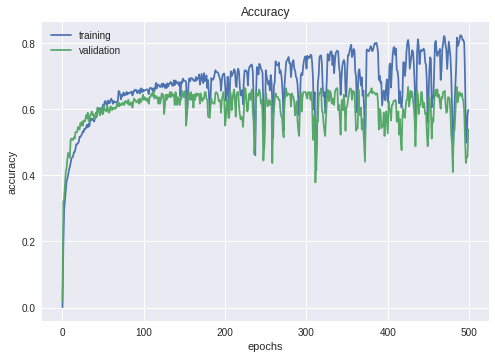

In [8]:
plt.plot(np.arange(len(history.history['acc'])), 
         history.history['acc'], label = 'training')
plt.plot(np.arange(len(history.history['val_acc'])),
         history.history['val_acc'], label = 'validation')

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc = 0)
plt.show()